In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# noise model
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error
from qiskit.providers.fake_provider import FakeBelemV2

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

Se Obtiene un modelo con ruido equivalente a un hardware real en este caso de la comptuadora de 5 qubits Belem

In [2]:
backend = FakeBelemV2()

Se muestra el diagrama de relación de error entre compuertas de 1 y 2 qubits.

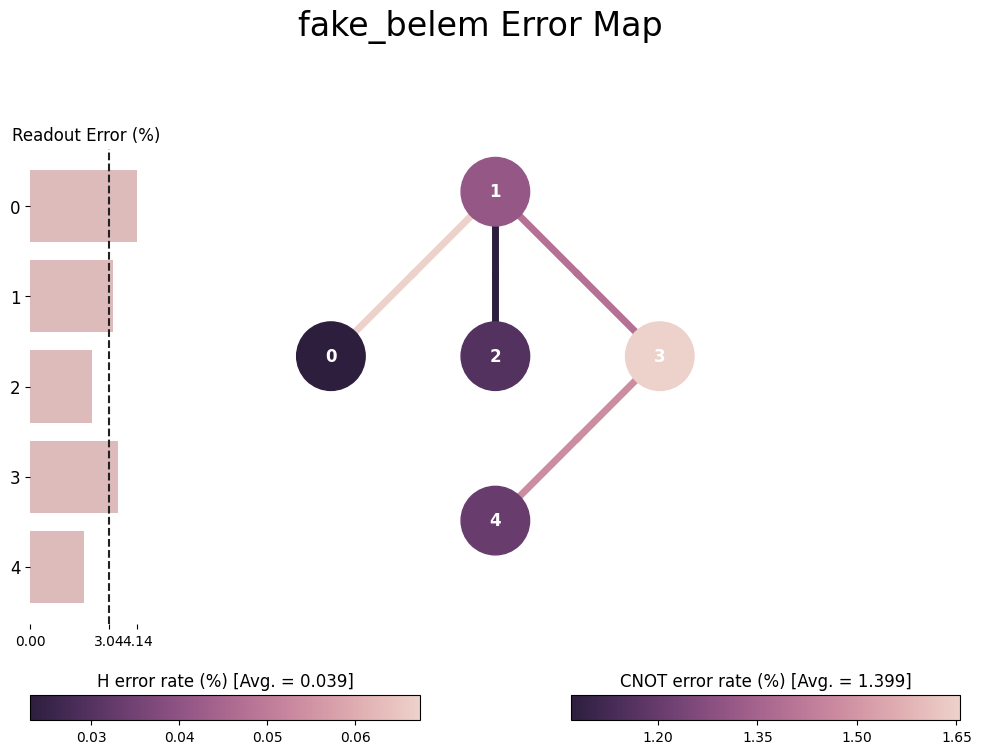

In [3]:
plot_error_map(backend)

Es necesario saber las compuertas base de nuestro backend

In [4]:
backend.operation_names

['id', 'rz', 'sx', 'x', 'cx', 'reset', 'measure', 'delay']

Identificar las conexiones entre dos qubits que se pueden hacer

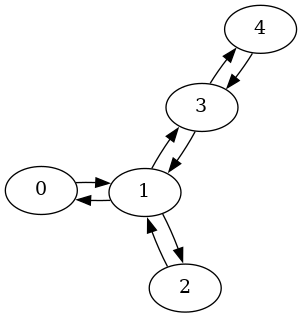

In [5]:
backend.coupling_map.draw()

Utilizar un ejemplo base

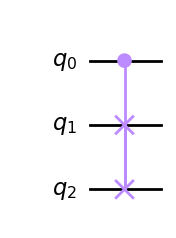

In [6]:
qc = QuantumCircuit(3)
qc.cswap(0,1,2)
qc.draw("mpl")

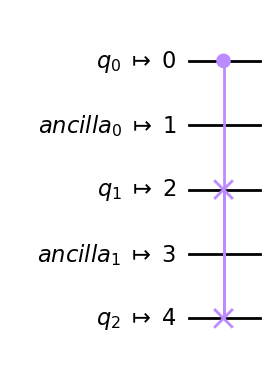

In [7]:
transpile(qc,backend=backend,optimization_level=0,initial_layout=[0,2,4], basis_gates=["cswap"]).draw("mpl")

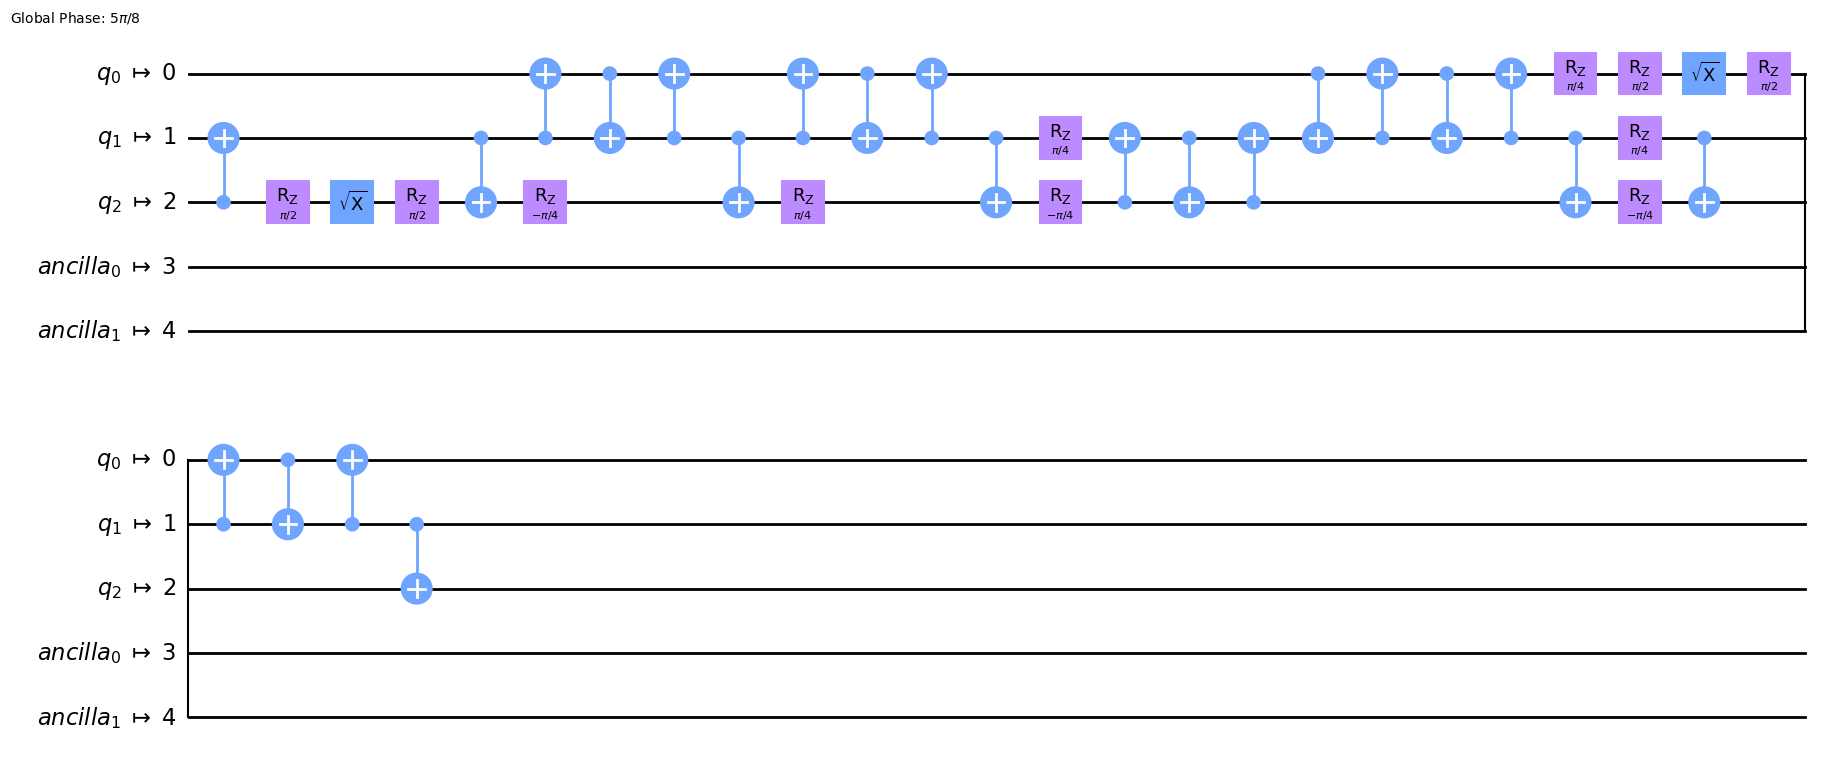

In [8]:
transpile(qc,backend=backend,optimization_level=0).draw("mpl")

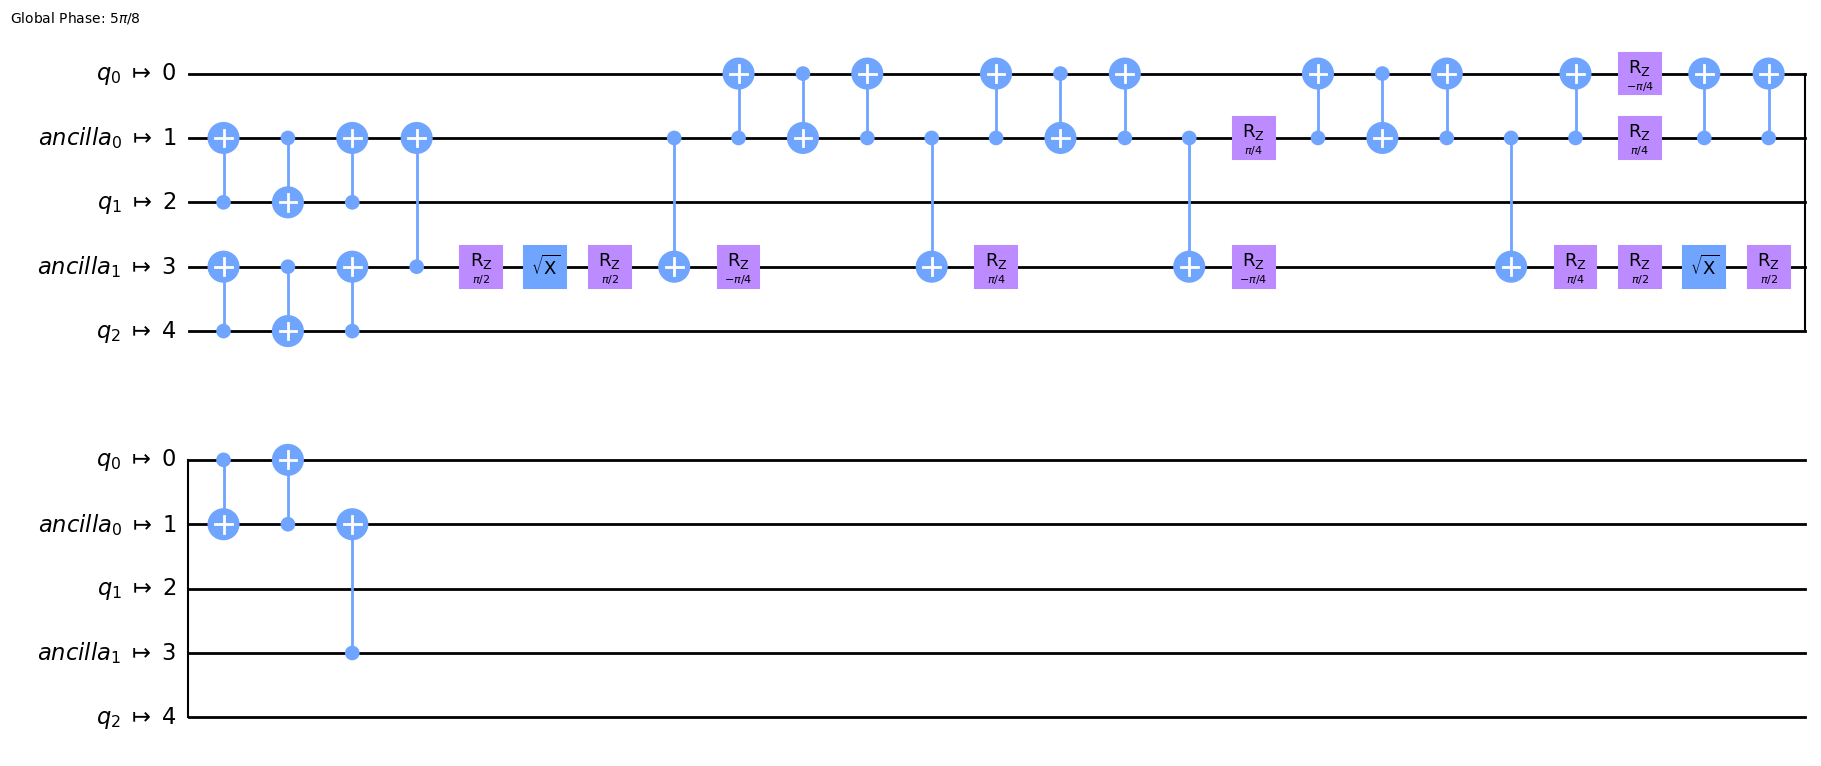

In [9]:
transpile(qc,backend=backend,optimization_level=0,initial_layout=[0,2,4]).draw("mpl")

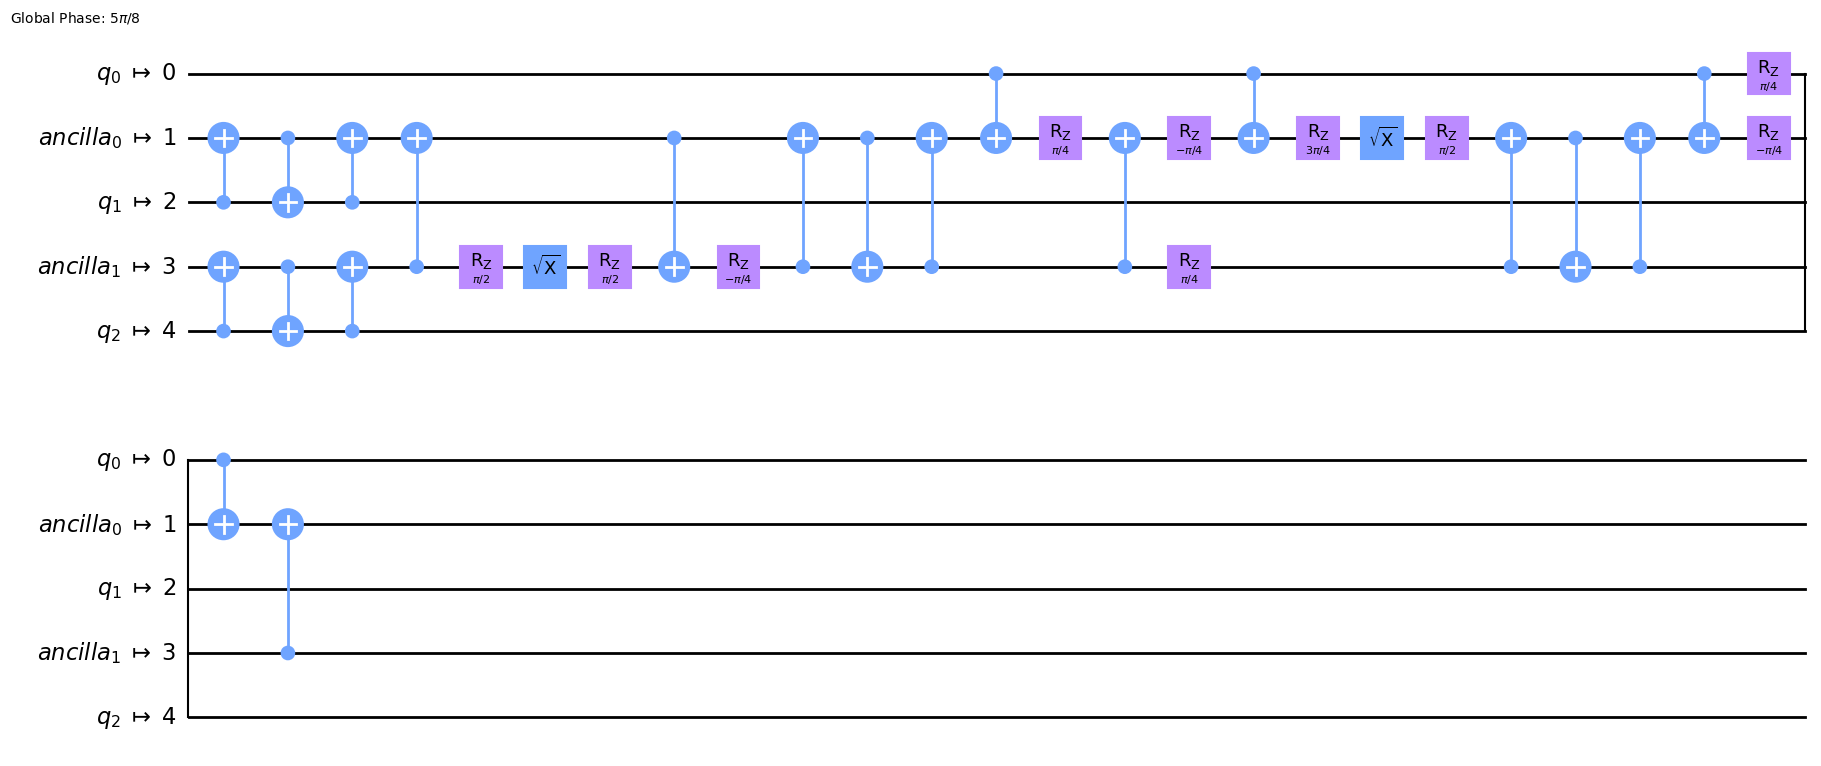

In [10]:
transpile(qc,backend=backend,optimization_level=1,initial_layout=[0,2,4]).draw("mpl")

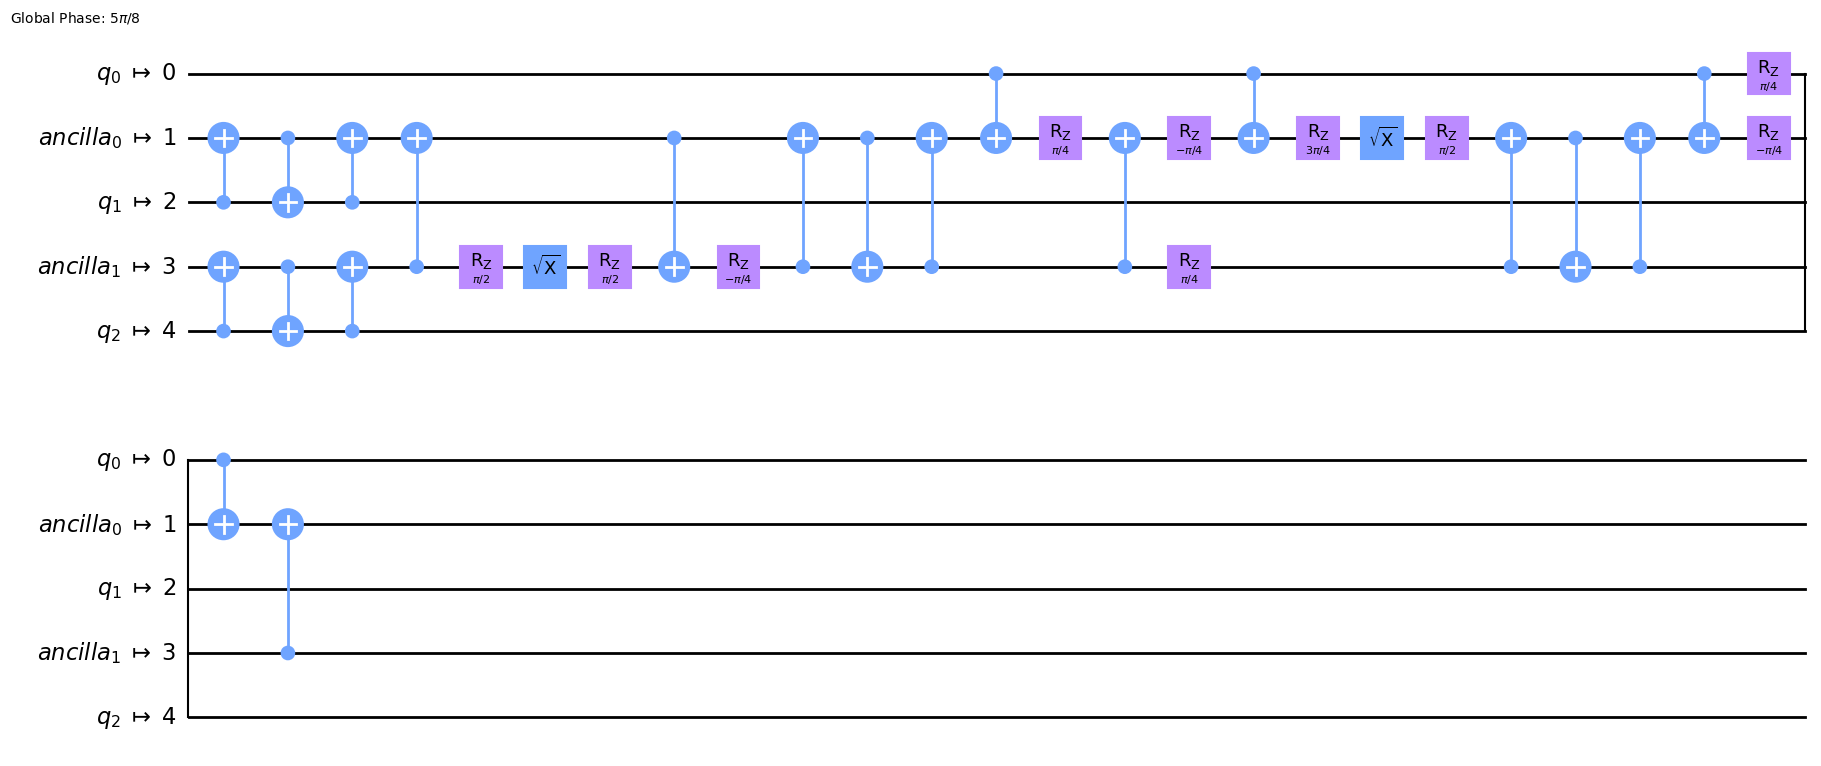

In [11]:
transpile(qc,backend=backend,optimization_level=2,initial_layout=[0,2,4]).draw("mpl")

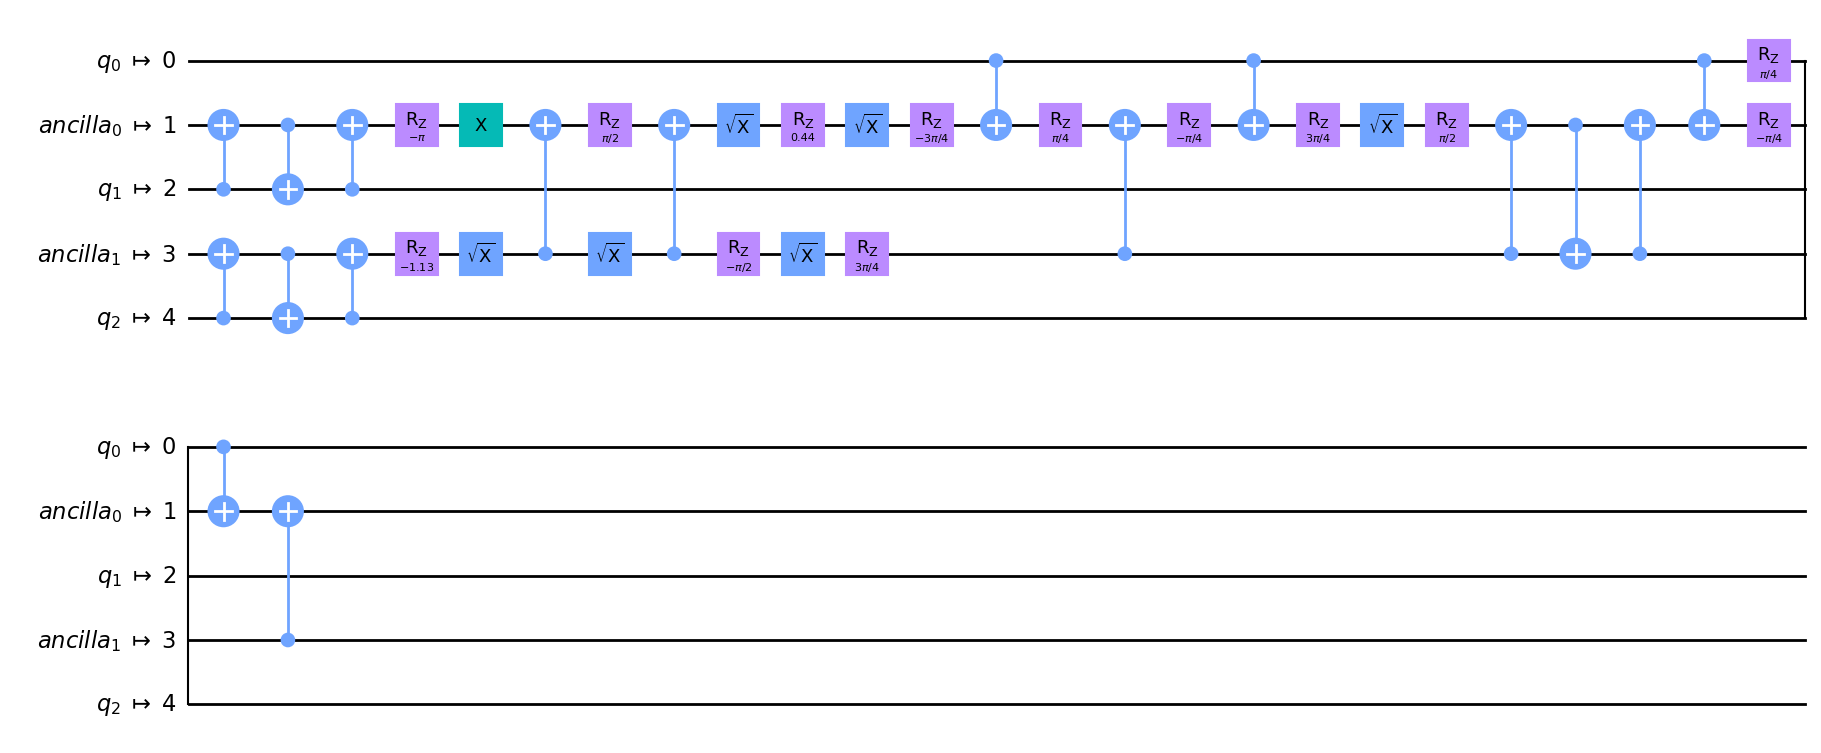

In [12]:
transpile(qc,backend=backend,optimization_level=3,initial_layout=[0,2,4]).draw("mpl")

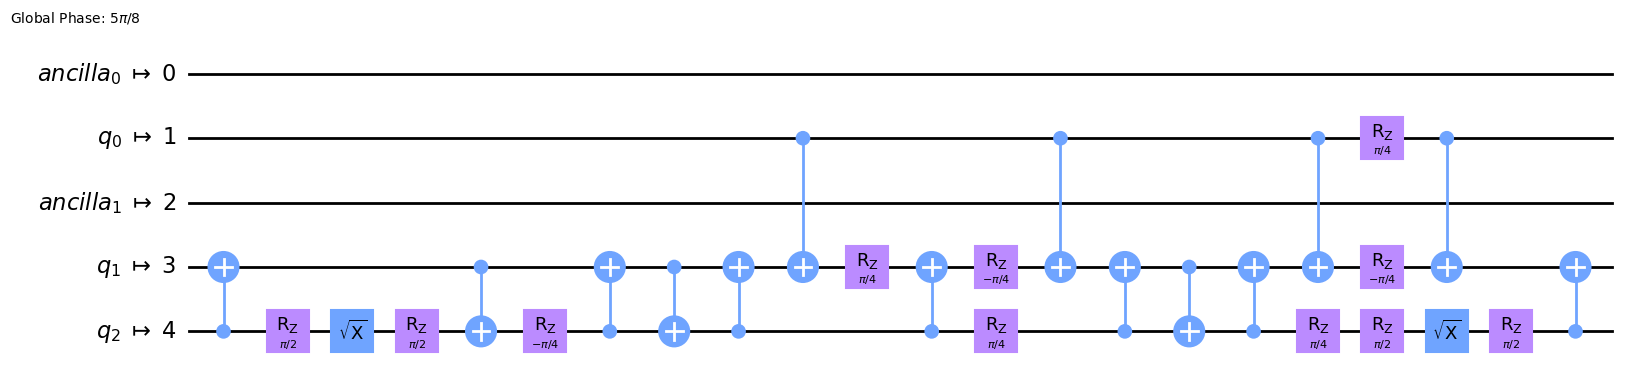

In [13]:
transpile(qc,backend=backend,optimization_level=0,initial_layout=[1,3,4]).draw("mpl")

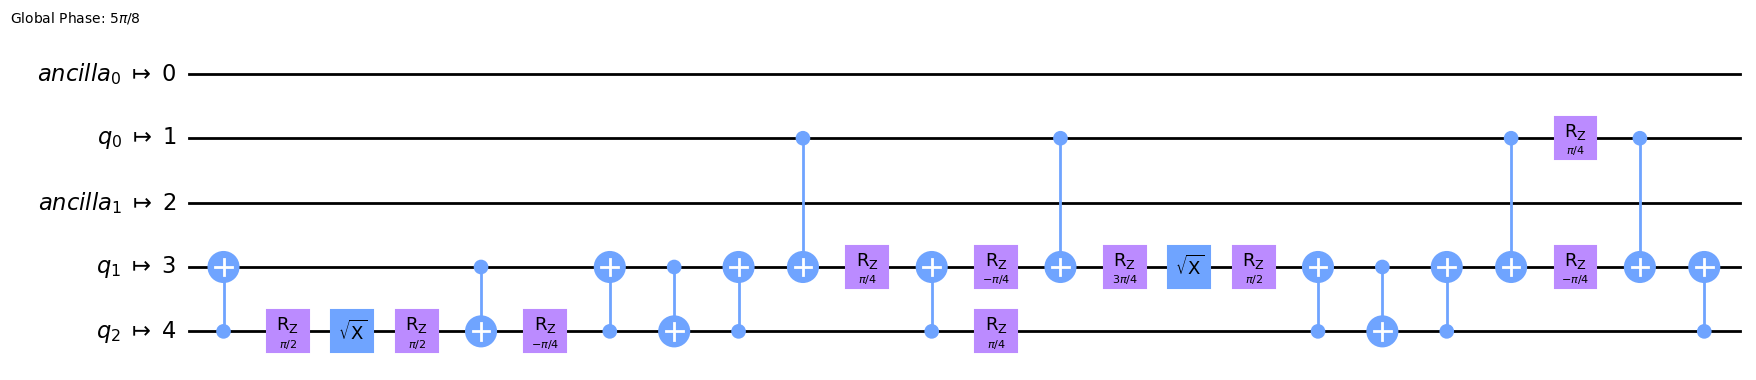

In [14]:
transpile(qc,backend=backend,optimization_level=1,initial_layout=[1,3,4]).draw("mpl")

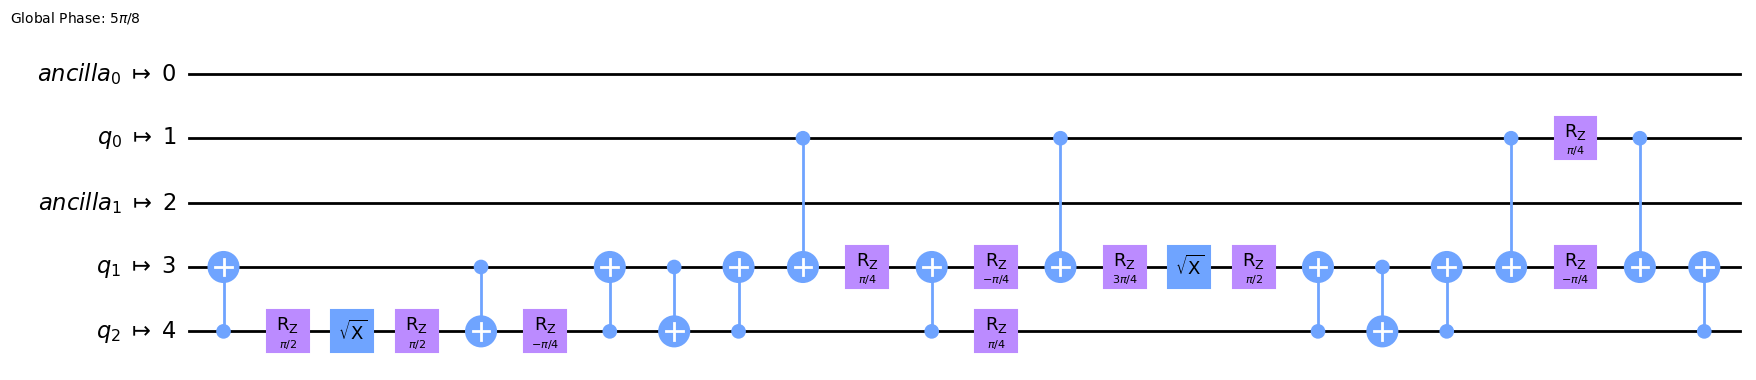

In [15]:
transpile(qc,backend=backend,optimization_level=2,initial_layout=[1,3,4]).draw("mpl")

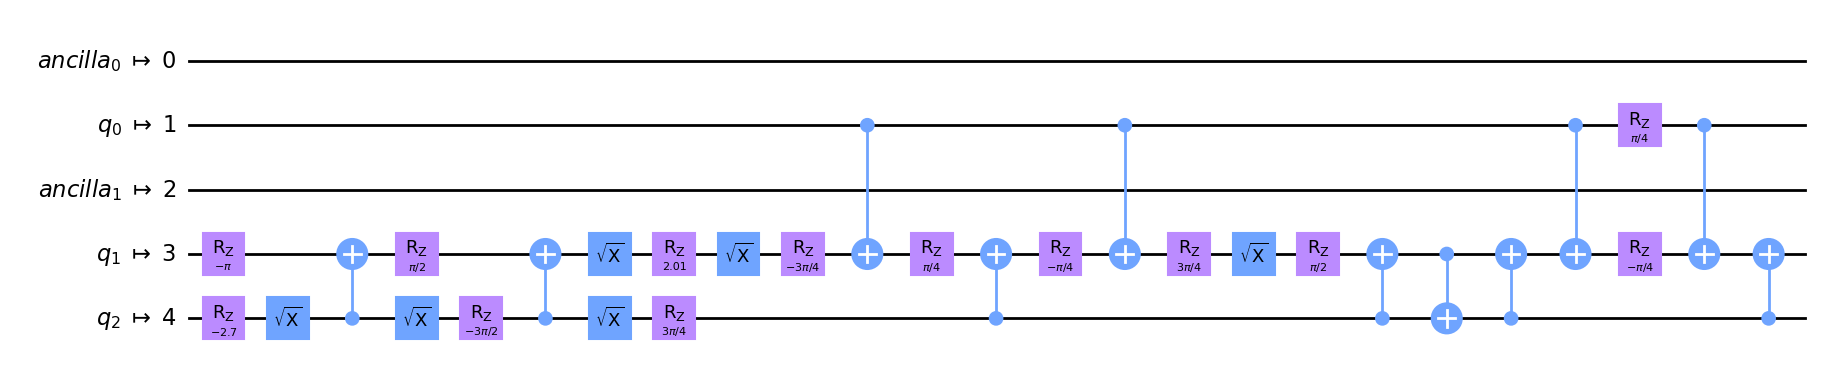

In [16]:
transpile(qc,backend=backend,optimization_level=3,initial_layout=[1,3,4]).draw("mpl")

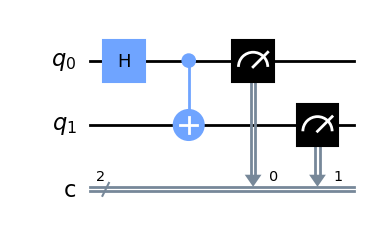

In [17]:
bell =  QuantumCircuit(2,2)

bell.h(0)
bell.cx(0,1)

bell.measure(range(2),range(2))
bell.draw("mpl")

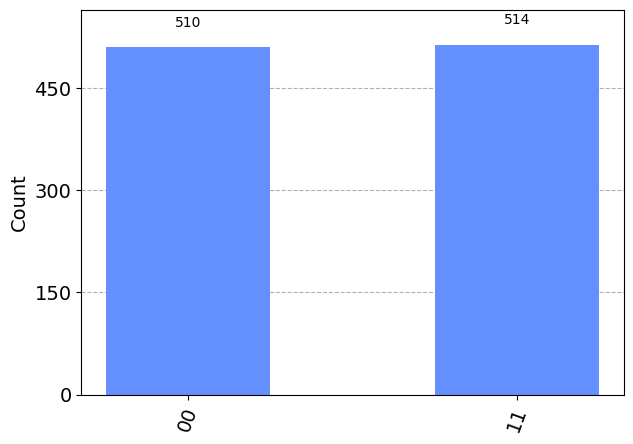

In [18]:
simulator = Aer.get_backend('aer_simulator')

counts = simulator.run(bell).result().get_counts()

plot_histogram(counts)

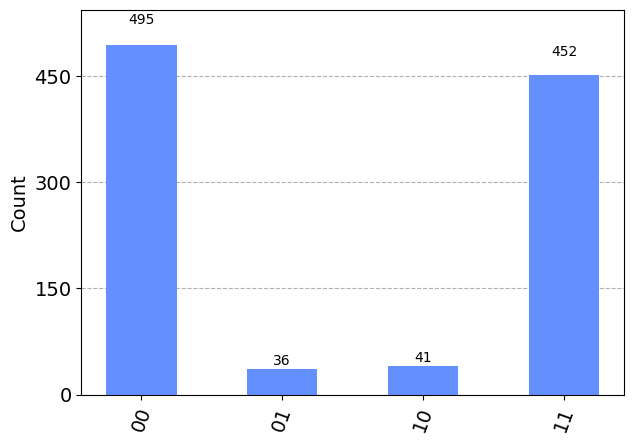

In [19]:
counts = backend.run(bell).result().get_counts()

plot_histogram(counts)

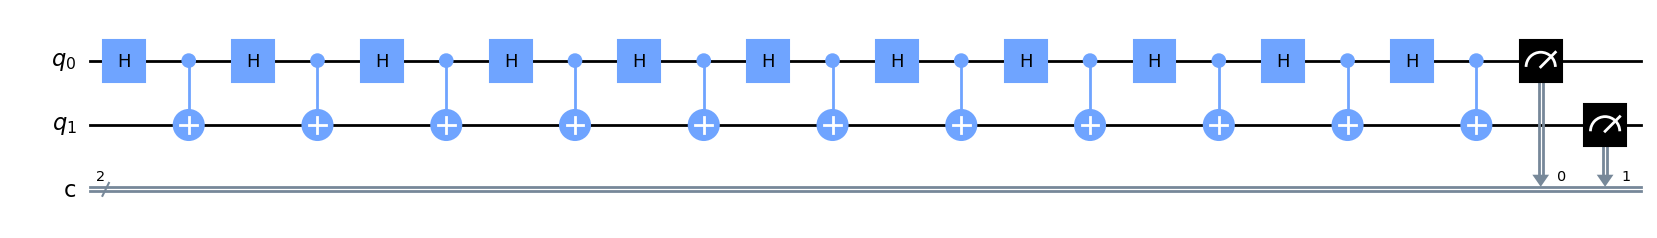

In [20]:
bell =  QuantumCircuit(2,2)

n  = 11

for i in range(n):
    bell.h(0)
    bell.cx(0,1)

bell.measure(range(2),range(2))
bell.draw("mpl")

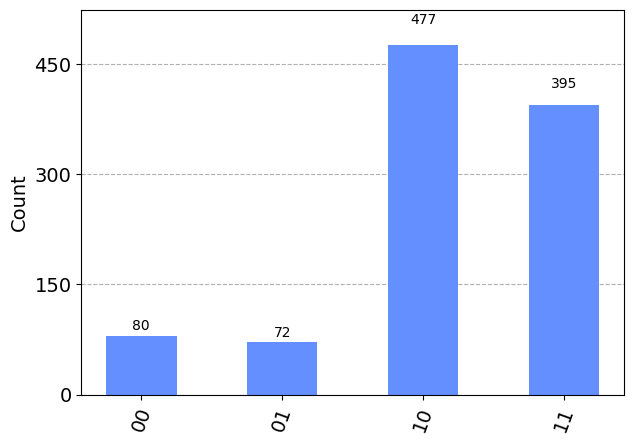

In [21]:
counts = backend.run(transpile(bell, optimization_level = 0)).result().get_counts()

plot_histogram(counts)

In [26]:

f = open("token.txt", "r")
token = f.read()
token[::-1]

'6f173b6a856e4107174d9dfc6e872e807b7cea04963489cdcf4cbb5aef0e59d31e80d8d0762d3f5ad06bf12d88b7907bd712aa5736c0ab626014e5d474de23b9'

In [23]:
from qiskit_ibm_provider import IBMProvider


f = open("token.txt", "r")
token = f.read()

                 
                 
# Get the API token in https://quantum-computing.ibm.com/account
provider = IBMProvider(token='9b32ed474d5e410626ba0c6375aa217db7097b88d21fb60da5f3d2670d8d08e13d95e0fea5bbc4fcdc98436940aec7b708e278e6cfd9d4717014e658a6b371f6')
backend = provider.get_backend("simulator_statevector")


# Build circuit
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1], [0,1])


# Transpile circuit
from qiskit import transpile
transpiled_circuit = transpile(circuit, backend)


# Run the circuit and get result
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
print(counts)

KeyboardInterrupt: 